<a href="https://colab.research.google.com/github/jahirxtrap/TIC_DKN_CORE_Dataset/blob/master/TIC_DKN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo de Integración Curricular

## Librerías y rutas

In [1]:
# Librerías
!pip install recommenders --quiet
!pip install fasttext --quiet
!pip install faker --quiet
!pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.3/355.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 28.2 MB/s et

### Rutas

In [2]:
import os
import pandas as pd
import numpy as np

# Datos
input_file = '/content/drive/MyDrive/TIC/data.jsonl'
output_file = '/content/drive/MyDrive/TIC/data.csv'
interactions_path = '/content/drive/MyDrive/TIC/interactions.csv'

# Dataset
df = pd.read_csv(output_file)

# Carpeta de salida
output_dir = "/content/drive/MyDrive/TIC/dkn_output"
os.makedirs(output_dir, exist_ok=True)

# Archivo para las predicciones y resultados
predict_path = os.path.join(output_dir, "predict.txt")
result_path = os.path.join(output_dir, "result.txt")

# Ruta del modeo
model_path = "/content/drive/MyDrive/TIC/dkn_output/model"

## Ingeniería de datos

In [3]:
import json
import csv

# Limite de datos a exportar (después de eliminar duplicados)
limite_datos = 100000

# Leer todos los datos del archivo JSONL
try:
    data_completa = []
    with open(input_file, 'r', encoding='utf-8') as jsonl_file:
        for line in jsonl_file:
            if line.strip():
                data_completa.append(json.loads(line.strip()))
    print(f"Dataset cargado correctamente con {len(data_completa)} registros totales")
except Exception as e:
    print(f"Error al leer el archivo: {e}")
    exit(1)

# Eliminar registros con DOIs duplicados (conservando solo el primero)
doi_seen = set()
data_sin_duplicados = []
duplicados_doi = 0

for item in data_completa:
    doi = item.get("doi")
    if doi and doi in doi_seen:
        duplicados_doi += 1
        continue
    if doi:
        doi_seen.add(doi)
    data_sin_duplicados.append(item)

print(f"Se eliminaron {duplicados_doi} registros con DOI duplicado")
print(f"Quedan {len(data_sin_duplicados)} registros únicos")

# Aplicar límite si es necesario
if limite_datos > 0 and limite_datos < len(data_sin_duplicados):
    data_final = data_sin_duplicados[:limite_datos]
    print(f"Exportando los primeros {limite_datos} registros únicos")
else:
    data_final = data_sin_duplicados
    print(f"Exportando todos los {len(data_final)} registros únicos")

# Obtener encabezados únicos
fieldnames = set()
for item in data_final:
    fieldnames.update(item.keys())
fieldnames = list(fieldnames)

# Escribir archivo CSV
try:
    with open(output_file, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for row in data_final:
            writer.writerow(row)

    print(f"Archivo CSV creado exitosamente en {output_file} con {len(data_final)} registros")
except Exception as e:
    print(f"Error al escribir el archivo CSV: {e}")

Dataset cargado correctamente con 100000 registros totales
Se eliminaron 28079 registros con DOI duplicado
Quedan 71921 registros únicos
Exportando todos los 71921 registros únicos
Archivo CSV creado exitosamente en /content/drive/MyDrive/TIC/data.csv con 71921 registros


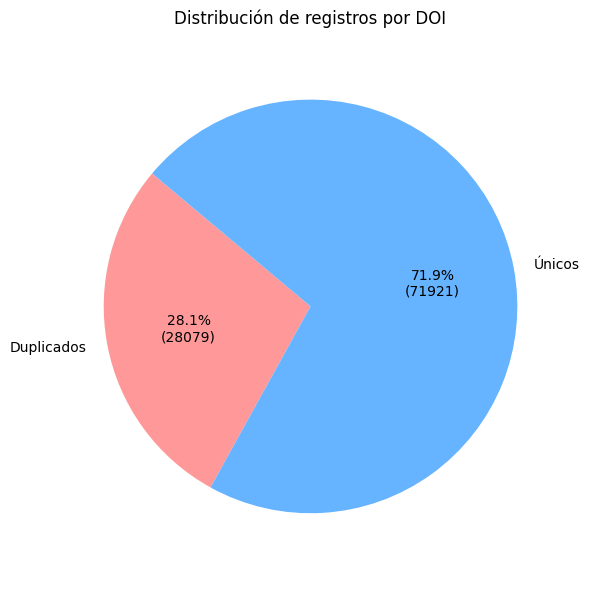

In [6]:
# Gráfica
import matplotlib.pyplot as plt

# Datos para la gráfica
labels = ['Duplicados', 'Únicos']
sizes = [duplicados_doi, len(data_sin_duplicados)]
colors = ['#ff9999', '#66b3ff']

# Función personalizada para mostrar porcentaje y cantidad
def autopct_func(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct=lambda pct: autopct_func(pct, sizes),
        startangle=140)
plt.title('Distribución de registros por DOI')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Mostrar los registros procesados
df = pd.read_csv(output_file)
df.head()

,original_title,processed_title,core_id,labelled_duplicates,processed_abstract,cat,doi,original_abstract
0,Mutation of solute carrier SLC16A12 associates...,mutation of solute carrier slc16a12 associates...,11251086,['82332306'],unobstructed vision refractive lens differenti...,exact_dup,10.1016/j.ajhg.2007.12.013,Unobstructed vision requires a particular refr...
1,Polarization control in two-color above-thresh...,polarization control in two-color above-thresh...,11309751,['147599753'],multiphoton ionization helium combining extrem...,exact_dup,10.1103/PhysRevLett.101.193002,Two-color multiphoton ionization of atomic hel...
2,Optimisation of the enzyme-linked lectin assay...,optimisation of the enzyme-linked lectin assay...,11311385,['147603441'],lectin’s capable recognising oligosaccharide t...,exact_dup,10.1016/j.ab.2011.02.013,Lectin’s are proteins capable of recognising a...
3,"Vertical composition fluctuations in (Ga,In)(N...","vertical composition fluctuations in (ga,in)(n...",11992240,['148653623'],microscopy interfacial uniformity wells grown ...,exact_dup,10.1016/j.jpcs.2007.07.063,"In this work, we present a detailed transmissi..."
4,Three-dimensional streaming flows driven by os...,three-dimensional streaming flows driven by os...,11994990,['148656283'],oscillatory attached deformable walls boundari...,exact_dup,10.1016/S0169-5983(03)00013-3,Three-dimensional (3D) oscillatory boundary la...


### Historial de usuarios

In [11]:
from faker import Faker
import pandas as pd
from sklearn.model_selection import train_test_split

# Inicializar Faker
faker = Faker()

# Número de usuarios a generar
num_users = 2000

# Crear usuarios únicos
users = [faker.user_name() for _ in range(num_users)]

# Crear interacciones aleatorias entre usuarios y artículos
interactions = []

# Asegurar al menos una interacción por usuario
for user in users:
    article = df.sample(1).iloc[0]
    interactions.append({
        'click': int(np.random.rand() < 0.8), # interacciones positivas (1) y negativas (0), 80% probabilidad de interacción positiva
        'user': user,
        'id': article['core_id']
    })

# Generar entre 4 y 9 interacciones adicionales por usuario
for user in users:
    n_extras = np.random.randint(3, 10)  # entre 4 y 9 extras
    for _ in range(n_extras):
        article = df.sample(1).iloc[0]
        interactions.append({
            'click': int(np.random.rand() < 0.8), # interacciones positivas (1) y negativas (0), 80% probabilidad de interacción positiva
            'user': user,
            'id': article['core_id']
        })

# Crear dataframe a partir de las interacciones
inter_df = pd.DataFrame(interactions)
inter_df.to_csv(interactions_path, index=False)


# Primero dividimos en train (80%) y temp (20%)
train_df, temp_df = train_test_split(inter_df, test_size=0.2, random_state=42)

# Luego dividimos temp en valid (10%) y test (10%) -> 10/20 = 0.5
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Función para escribir archivos de interacción
def write_interaction_file(sub_df, filename):
    with open(os.path.join(output_dir, filename), "w") as f:
        for _, row in sub_df.iterrows():
            f.write(f"{row['click']} {row['user']} {row['id']}\n")

# Generar archivos de interacción
write_interaction_file(train_df, "train.txt")
write_interaction_file(valid_df, "valid.txt")
write_interaction_file(test_df, "test.txt")

# Historial de usuario (clicks positivos)
click_history = inter_df[inter_df['click'] == 1].groupby('user')['id'].apply(list).to_dict()

# Escribir historial de usuarios
with open(os.path.join(output_dir, "user_history.txt"), "w") as f:
    for user in users:
        articles = click_history.get(user, [])
        recent = articles[-10:] if articles else [0]
        f.write(f"{user} {','.join(map(str, recent))}\n")

print(f"Total de interacciones generadas: {len(inter_df)}")
print(f"- Interacciones de entrenamiento: {len(train_df)}")
print(f"- Interacciones de validación: {len(valid_df)}")
print(f"- Interacciones de prueba: {len(test_df)}")

Total de interacciones generadas: 14082
- Interacciones de entrenamiento: 11265
- Interacciones de validación: 1408
- Interacciones de prueba: 1409


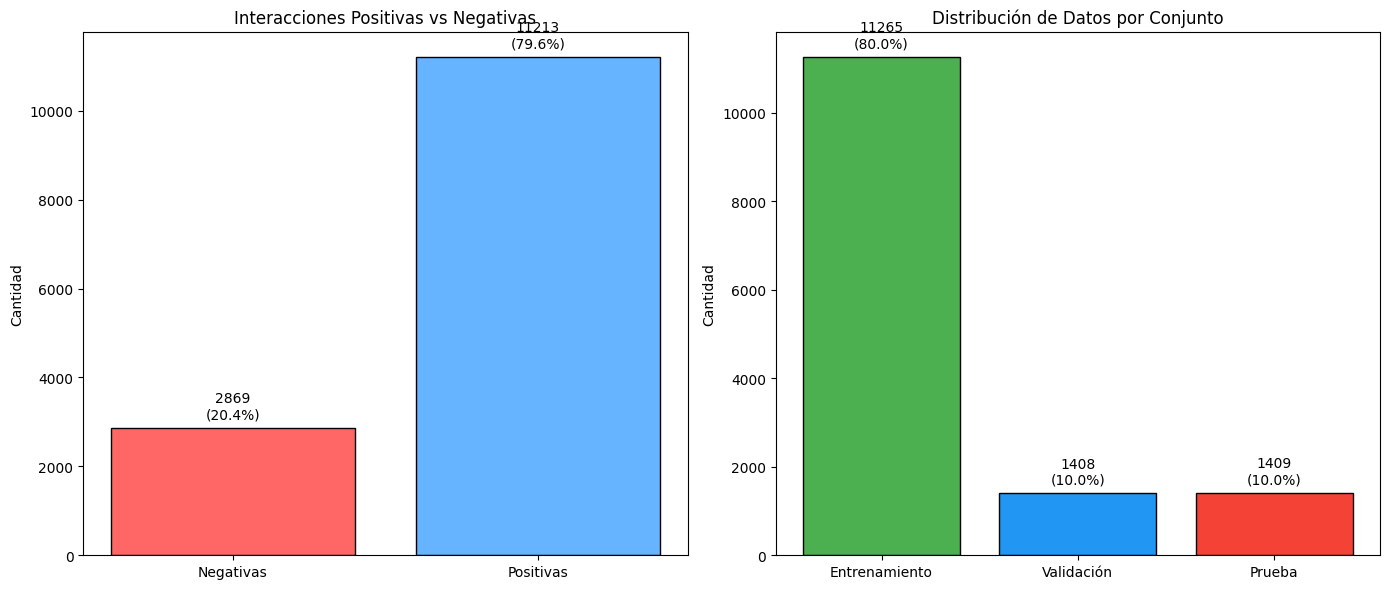

In [12]:
# Gráficas
import matplotlib.pyplot as plt

# Datos
click_counts = inter_df['click'].value_counts().sort_index()  # 0: Negativas, 1: Positivas
click_labels = ['Negativas', 'Positivas']
click_total = click_counts.sum()

partition_sizes = {'Entrenamiento': len(train_df), 'Validación': len(valid_df), 'Prueba': len(test_df)}
partition_total = sum(partition_sizes.values())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bar_colors = ['#ff6666', '#66b3ff']

# Interacciones Positivas vs Negativas
axes[0].bar(click_labels, click_counts, color=bar_colors, edgecolor='black')
axes[0].set_title('Interacciones Positivas vs Negativas')
axes[0].set_ylabel('Cantidad')
for i, count in enumerate(click_counts):
    pct = 100 * count / click_total
    axes[0].text(i, count + click_total * 0.01, f'{count}\n({pct:.1f}%)',
                 ha='center', va='bottom', fontsize=10)

# Distribución de datos por conjunto
axes[1].bar(partition_sizes.keys(), partition_sizes.values(), color=['#4caf50', '#2196f3', '#f44336'], edgecolor='black')
axes[1].set_title('Distribución de Datos por Conjunto')
axes[1].set_ylabel('Cantidad')
for i, (label, count) in enumerate(partition_sizes.items()):
    pct = 100 * count / partition_total
    axes[1].text(i, count + partition_total * 0.01, f'{count}\n({pct:.1f}%)',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Ingeniería de modelos

### Word embeddings

In [13]:
import json
import fasttext

# Guardar los tokens para FastText
with open(os.path.join(output_dir, "tokenized_abstract.txt"), "w", encoding="utf-8") as f:
    for text in df['processed_abstract']:
        if isinstance(text, str):  # Verificar que el texto no sea None o NaN
            f.write(text.strip() + "\n")

# Crear vocabulario con IDs
word2id = {"<PAD>": 0, "<UNK>": 1}  # Añadimos un token para palabras desconocidas
id_counter = 2
for text in df['processed_abstract']:
    if isinstance(text, str):
        for word in text.strip().split():
            if word not in word2id:
                word2id[word] = id_counter
                id_counter += 1

print(f"Vocabulario creado con {len(word2id)} palabras únicas")

# Entrenar modelo FastText (skipgram)
model = fasttext.train_unsupervised(
    os.path.join(output_dir, "tokenized_abstract.txt"),
    model='skipgram',
    dim=100,
    ws=5,
    epoch=5,
    minCount=5
)

# Crear matriz de embeddings
embedding_dim = model.get_dimension()
embedding_matrix = np.zeros((len(word2id), embedding_dim))

# Inicializar con vectores aleatorios para <PAD> y <UNK>
embedding_matrix[1] = np.random.uniform(-0.25, 0.25, embedding_dim)  # <UNK>

# Llenar la matriz de embeddings
for word, idx in word2id.items():
    if word not in ["<PAD>", "<UNK>"]:
        embedding_matrix[idx] = model.get_word_vector(word)

# Guardar word embeddings
np.save(os.path.join(output_dir, "word_embeddings.npy"), embedding_matrix)

# Guardar el vocabulario para futura referencia
with open(os.path.join(output_dir, "word2id.json"), "w", encoding="utf-8") as f:
    json.dump(word2id, f, ensure_ascii=False, indent=2)

print(f"Matriz de embeddings guardada con forma: {embedding_matrix.shape}")

Vocabulario creado con 221896 palabras únicas
Matriz de embeddings guardada con forma: (221896, 100)


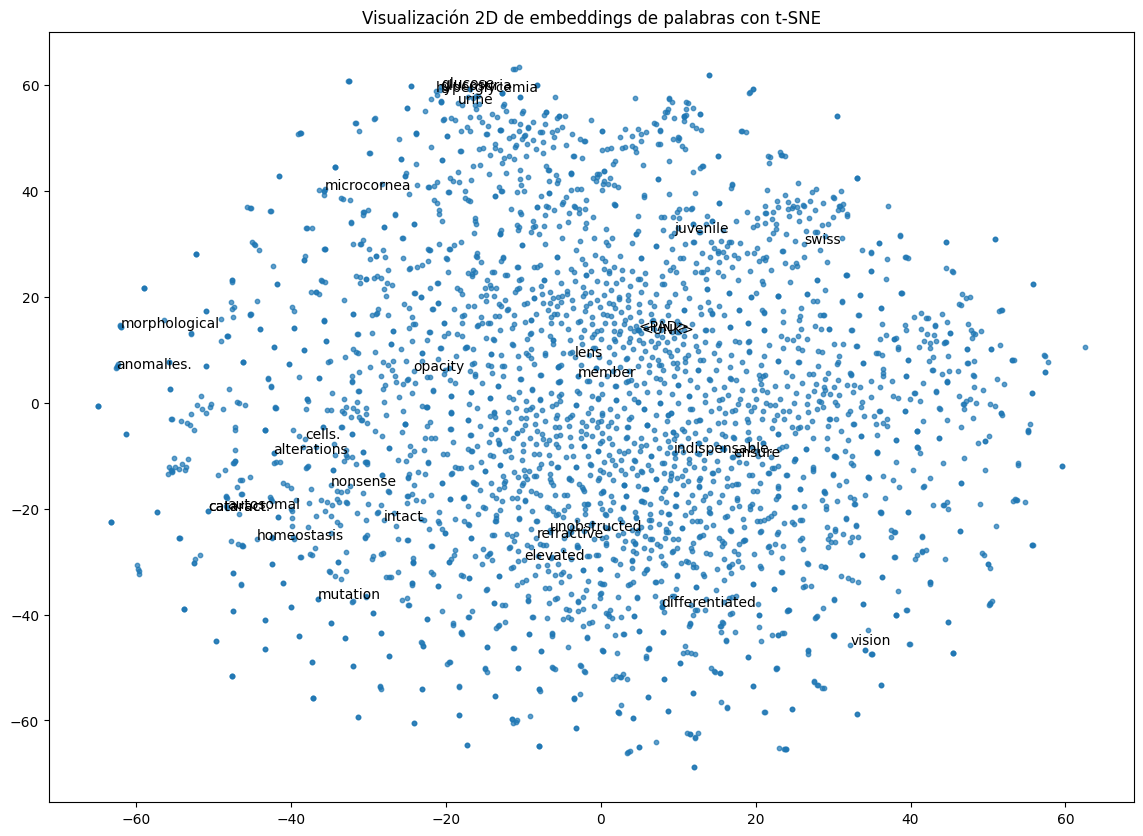

In [17]:
# Gráfica
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar un subconjunto de palabras para visualizar
top_n = 3000
words = list(word2id.keys())[:top_n]
embeddings_subset = embedding_matrix[:top_n]

# Reducir dimensión a 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_subset)

plt.figure(figsize=(14,10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, alpha=0.7)

# Mostrar etiquetas para algunas palabras seleccionadas
for i, word in enumerate(words[:30]):  # Mostrar solo las primeras 30 para evitar saturar
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('Visualización 2D de embeddings de palabras con t-SNE')
plt.show()

### Features

In [16]:
import json

# Cargar los embeddings ya generados
word_embeddings = np.load(os.path.join(output_dir, "word_embeddings.npy"))

# Cargar el vocabulario
with open(os.path.join(output_dir, "word2id.json"), "r", encoding="utf-8") as f:
    word2id = json.load(f)

# Tamaño de documento
doc_size = 10

# Función para obtener los índices de palabras más relevantes
def get_top_index(abstract, word2id, word_embeddings, num_indices=doc_size):
    # Tokenizar el abstract
    tokens = abstract.strip().split()
    # Obtener los índices de las palabras en el vocabulario
    index = [word2id.get(word, 1) for word in tokens]  # Si no está en el vocabulario, usar <UNK>
    # Crear un vector de embedding para cada palabra y obtener los top indices
    embedding_indices = np.array([word_embeddings[idx] for idx in index if idx < len(word_embeddings)])
    # Si el vector de embedding está vacío, llenar con ceros
    if len(embedding_indices) == 0:
        return [0] * num_indices

    # Calcular la similitud y obtener los índices más importantes
    similarity_scores = np.abs(embedding_indices).sum(axis=1)
    top_indices = np.argsort(similarity_scores)[-num_indices:]
    # Devolver los índices más relevantes y rellenar si es necesario
    return top_indices.tolist() + [0] * (num_indices - len(top_indices))

# Aplicar la función a cada artículo en el dataframe
df['word_ids'] = df['processed_abstract'].apply(lambda x: get_top_index(x, word2id, word_embeddings))

# Artículos únicos utilizados
unique_articles = df.drop_duplicates(subset='core_id')

# Escribir archivo de características
with open(os.path.join(output_dir, "features.txt"), "w") as f:
    for _, row in unique_articles.iterrows():
        word_str = ",".join(map(str, row['word_ids']))
        entity_str = ",".join(["0"] * doc_size)
        f.write(f"{row['core_id']} {word_str} {entity_str}\n")

# Padding dummy (para el ID 0)
with open(os.path.join(output_dir, "features.txt"), "a") as f:
    f.write("0 " + ",".join(["0"] * doc_size) + " " + ",".join(["0"] * doc_size) + "\n")

print(f"Todos los archivos DKN se generaron en: {output_dir}")
print(f"Total de artículos utilizados: {len(unique_articles)}")

Todos los archivos DKN se generaron en: /content/drive/MyDrive/TIC/dkn_output
Total de artículos utilizados: 71921


### Entrenamiento del modelo

In [18]:
from recommenders.models.deeprec.deeprec_utils import prepare_hparams
from recommenders.models.deeprec.models.dkn import DKN
from recommenders.models.deeprec.io.dkn_iterator import DKNTextIterator

# Hiperparámetros para entrenar el modelo
hparams = prepare_hparams(
    yaml_file=None,
    news_feature_file=os.path.join(output_dir, "features.txt"),
    user_history_file=os.path.join(output_dir, "user_history.txt"),
    wordEmb_file=os.path.join(output_dir, "word_embeddings.npy"),
    MODEL_DIR=model_path,
    metrics=['acc'],
    # General
    learning_rate=0.001,
    epochs=3,
    batch_size=2,
    show_step=200,
    model_type="dkn",
    data_format="dkn",
    # DKN
    history_size=10,
    doc_size=10,
    word_embedding_dim=100,
    entity_embedding_dim=100,
    entity_vocab_size=100000,
    use_entity=False,
    use_context=False,
    num_filters=128,
    filter_sizes=[3],
    layer_sizes=[128],
    activation=["relu"],
    loss="cross_entropy_loss",
    optimizer="adam",
    train_num_ngs=4,
    test_num_ngs=4,
    entity_dim=100,
    dim=100,
    entity_size=100000,
    attention_layer_sizes=128,
    attention_activation="relu",
    method="regression"
)

# Instanciar el modelo
model = DKN(hparams, DKNTextIterator)

In [ ]:
# Entrenar el modelo
model.fit(
    os.path.join(output_dir, "train.txt"),
    os.path.join(output_dir, "valid.txt")
)

step 200 , total_loss: 0.9713, data_loss: 0.9713
step 400 , total_loss: 0.1928, data_loss: 0.1928
step 600 , total_loss: 0.2214, data_loss: 0.2214
step 800 , total_loss: 0.2016, data_loss: 0.2016
step 1000 , total_loss: 0.8052, data_loss: 0.8052
step 1200 , total_loss: 0.9277, data_loss: 0.9277
step 1400 , total_loss: 1.2035, data_loss: 1.2035
step 1600 , total_loss: 0.7935, data_loss: 0.7935
step 1800 , total_loss: 0.1071, data_loss: 0.1071
step 2000 , total_loss: 0.2573, data_loss: 0.2573
step 2200 , total_loss: 0.2520, data_loss: 0.2520
step 2400 , total_loss: 0.1817, data_loss: 0.1817
step 2600 , total_loss: 0.1849, data_loss: 0.1849
step 2800 , total_loss: 0.1230, data_loss: 0.1230
step 3000 , total_loss: 0.2441, data_loss: 0.2441
step 3200 , total_loss: 0.1351, data_loss: 0.1351
step 3400 , total_loss: 0.8161, data_loss: 0.8161
step 3600 , total_loss: 0.3223, data_loss: 0.3223
step 3800 , total_loss: 0.7832, data_loss: 0.7832
step 4000 , total_loss: 0.2739, data_loss: 0.2739
step

In [ ]:
# Guardar el modelo
model.saver.save(model.sess, os.path.join(model_path, 'dkn_model.ckpt'))
print("Modelo guardado en:", model_path)

## Evaluación

In [ ]:
# Cargar el modelo
model.load_model(os.path.join(model_path, 'dkn_model.ckpt'))
print("Modelo cargado")

Modelo cargado


In [ ]:
# Evaluación con el conjunto de prueba
result = model.run_eval(os.path.join(output_dir, "test.txt"))
accuracy = result.get('acc', 0.0)
print(f"Resultado de evaluación:\n- Accuracy: {accuracy:.2%}")

Resultado de evaluación:
- Accuracy: 80.20%


### Predicción

In [ ]:
import random

# Datos
inter_df = pd.read_csv(interactions_path)

# Número de usuarios a evaluar
num_users = 2

# Lista de usuarios y artículos del dataset
usuarios = inter_df['user'].unique().tolist()
articulos = inter_df['core_id'].astype(str).unique().tolist()

# Elegir usuarios aleatorios sin repetición
usuarios_seleccionados = random.sample(usuarios, min(num_users, len(usuarios)))

# Abrir el archivo predict.txt para escribir
with open(predict_path, "w") as f:
    # Escribir una línea por cada combinación de usuario-artículo
    for user in usuarios_seleccionados:
        for item in articulos:
            f.write(f"1 {user} {item}\n")

# Predecir
model.predict(predict_path, result_path)

In [ ]:
top_k = 10
user_scores = {}

with open(predict_path) as f_in, open(result_path) as f_out:
    for user_line, score_line in zip(f_in, f_out):
        parts = user_line.strip().split()
        user = parts[1]
        item_id = parts[2]
        score = float(score_line.strip())

        if user not in user_scores:
            user_scores[user] = []

        user_scores[user].append((item_id, score))

# Crear diccionario con solo los top_k ítems por usuario
top_user_scores = {
    user: sorted(scores, key=lambda x: x[1], reverse=True)[:top_k]
    for user, scores in user_scores.items()
}

# Mostrar los top_k ítems por usuario
for user, scores in top_user_scores.items():
    print(f"\nUsuario: {user}")
    recommended_articles = [f"Art. {item_id} - Score: {score:.4f}" for item_id, score in scores]
    print(f" Recomendaciones Top {top_k}: ")
    print("  " + " | ".join(recommended_articles))


Usuario: ccastillo
 Recomendaciones Top 10: 
  Art. 11309744 - Score: 1.5032 | Art. 35084840 - Score: 1.4051 | Art. 78495751 - Score: 1.3935 | Art. 129352635 - Score: 1.3865 | Art. 47269797 - Score: 1.3352 | Art. 147599687 - Score: 1.3262 | Art. 48198999 - Score: 1.3202 | Art. 52746281 - Score: 1.3186 | Art. 52129648 - Score: 1.3071 | Art. 52691543 - Score: 1.3028

Usuario: jacksonkrista
 Recomendaciones Top 10: 
  Art. 11309744 - Score: 1.6699 | Art. 35084840 - Score: 1.5707 | Art. 78495751 - Score: 1.5592 | Art. 129352635 - Score: 1.5522 | Art. 47269797 - Score: 1.5008 | Art. 147599687 - Score: 1.4919 | Art. 48198999 - Score: 1.4859 | Art. 52746281 - Score: 1.4843 | Art. 52129648 - Score: 1.4727 | Art. 52691543 - Score: 1.4684


### Interfaz

In [ ]:
import pandas as pd
import requests
import gradio as gr

# Cargamos los artículos del dataset
articles = {
    str(row["core_id"]): {
        "doi": row["doi"],
        "title": row["original_title"],
        "abstract": row["original_abstract"] or "No disponible",
        "authors": row.get("authors", "Desconocido"),
        "year": row.get("year", "Desconocido"),
        "doi_link": f"https://doi.org/{row['doi']}"
    }
    for _, row in df.iterrows()
}

# Función para obtener información usando Crossref
def get_article_info_from_crossref(doi):
    try:
        url = f"https://api.crossref.org/works/{doi}"
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        msg = response.json()['message']
        authors = ", ".join(f"{a.get('given', '')} {a.get('family', '')}" for a in msg.get('author', []))
        title = msg.get('title', [''])[0]
        abstract = msg.get('abstract', '')
        year = msg.get('published-print', msg.get('published-online', {})).get('date-parts', [[None]])[0][0]
        return {
            "title": title,
            "authors": authors,
            "abstract": abstract,
            "year": year,
            "doi_link": f"https://doi.org/{doi}"
        }
    except Exception as e:
        return None

# Función para cargar y actualizar la información de los artículos
def load_articles_info(top_user_scores):
    # Obtener todos los item_ids únicos
    unique_item_ids = set(item_id for user_items in top_user_scores.values() for item_id, _ in user_items)

    enriched_articles = {}
    for item_id in unique_item_ids:
        dataset_article = articles.get(item_id)
        if dataset_article:
            crossref_info = get_article_info_from_crossref(dataset_article["doi"])
            if crossref_info:
                # Combinar campo por campo: usar Crossref si existe, si no, usar dataset
                combined_info = {
                    "title": crossref_info.get("title") or dataset_article.get("title", "No disponible"),
                    "authors": crossref_info.get("authors") or dataset_article.get("authors", "Desconocido"),
                    "abstract": crossref_info.get("abstract") or dataset_article.get("abstract", "No disponible"),
                    "year": crossref_info.get("year") or dataset_article.get("year", "Desconocido"),
                    "doi_link": crossref_info.get("doi_link") or dataset_article.get("doi_link")
                }
            else:
                # Si no hay Crossref, usamos sólo el dataset
                combined_info = dataset_article
            enriched_articles[item_id] = combined_info
    return enriched_articles

# Precargamos la información de los artículos
enriched_articles = load_articles_info(top_user_scores)

In [ ]:
# Función principal para mostrar resultados
def recommend_articles(user):
    if user not in user_scores:
        return f"No hay recomendaciones para {user}", []

    top_items = sorted(top_user_scores[user], key=lambda x: x[1], reverse=True)[:top_k]
    recommendations = []

    for item_id, score in top_items:
        article = enriched_articles.get(item_id)
        if article:
            entry = f"""
            <div style="border:1px solid #ccc; padding:10px; border-radius:10px; margin-bottom:15px;">
                <h3>{article['title']} ({article['year']})</h3>
                <p><b>Autores:</b> {article['authors']}</p>
                <p><b>Abstract:</b> {article['abstract']}</p>
                <p><b>Score:</b> {score:.4f}</p>
                <a href="{article['doi_link']}" target="_blank">
                    <button style="padding:5px 10px; background:#007bff; color:white; border:none; border-radius:5px;">
                        Ver artículo
                    </button>
                </a>
            </div>
            """
            recommendations.append(entry)

    return f"Top {top_k} recomendaciones para el usuario {user}:", "\n".join(recommendations)

# Interfaz con Gradio
users = sorted(user_scores.keys())

interface = gr.Interface(
    fn=recommend_articles,
    inputs=gr.Dropdown(choices=users, label="Selecciona un usuario"),
    outputs=[
        gr.Textbox(label="Resumen"),
        gr.HTML(label="Artículos recomendados")
    ],
    title="Recomendador de artículos científicos",
    description="Selecciona un usuario para ver sus artículos recomendados con detalles enriquecidos desde Crossref."
)

interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f67882cef48b6196c6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f67882cef48b6196c6.gradio.live
